In [1]:
import os
import warnings 
warnings.filterwarnings('ignore')

from glob import glob
import numpy as np 
import pandas as pd
    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

**Data Path**

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv

# Loading and Have a Quick Look

**Cheking Meta data**

In [2]:
meta = pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv")

meta

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


**Add High Quality image Path to MetaData**

In [3]:
base_skin_dir = os.path.join('..', 'input/skin-cancer-mnist-ham10000')

# Dictionary to map image IDs to their corresponding file paths

imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))
}

In [4]:
meta['path'] = meta['image_id'].map(imageid_path_dict.get)

meta

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/ham10000_i...
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../input/skin-cancer-mnist-ham10000/ham10000_i...


# Visualizing Data

In [5]:
import plotly.express as px
import plotly.io as pio

# Calculate the value counts for each diagnosis
dx_counts = meta['dx'].value_counts()

# Choose a color palette for the bars (you can choose any other palette from px.colors)
color_palette = px.colors.qualitative.Pastel

# Create a bar chart using plotly express
fig = px.bar(x=dx_counts.values, y=dx_counts.index, orientation='h', color=dx_counts.index,
             color_discrete_sequence=color_palette)

# Customize the layout
fig.update_layout(title_text='Diagnosis Count',
                  xaxis_title='Count',
                  yaxis_title='Diagnosis',
                  xaxis_tickangle=-45,
                  plot_bgcolor='rgba(0, 0, 0, 0)',      # Transparent background
                  paper_bgcolor='rgba(240, 240, 240, 0.8)',  # Light gray background
                  font=dict(color='rgb(64, 64, 64)')   # Dark gray font color
                  )

# Display the plot in a new window
pio.show(fig)

**There are seven possible diagnosis codes in the dataset:**

**akiec**: Actinic keratoses and intraepithelial carcinoma / Bowen’s disease

**bcc**:   Basal cell carcinoma

**bkl**:   Benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses)

**df**:    Dermatofibroma

**mel**:   Melanoma

**nv**:    Melanocytic nevi

**vasc**:  Vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage)

In [6]:
meta['dx_code'] = pd.Categorical(meta['dx']).codes

meta

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,dx_code
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/ham10000_i...,2
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../input/skin-cancer-mnist-ham10000/ham10000_i...,0


In [7]:
import plotly.express as px

# Create a histogram using plotly express
fig = px.histogram(meta, x="age", nbins=20, color="dx", color_discrete_sequence=px.colors.qualitative.Plotly,
                   title="Age Distribution")

# Customize the layout
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
                  paper_bgcolor='rgba(240, 240, 240, 0.8)',  # Light gray background
                  font=dict(color='rgb(64, 64, 64)'),  # Dark gray font color
                  xaxis_title='Age',
                  yaxis_title='Count')

# Show the plot
fig.show()

In [8]:
import plotly.express as px

# Calculate the value counts for each sex
sex_counts = meta['sex'].value_counts()

# Choose a color palette for the bars (you can choose any other palette from px.colors)
color_palette = px.colors.qualitative.Pastel

# Create a bar chart using plotly express
fig = px.bar(x=sex_counts.values, y=sex_counts.index, orientation='h', color=sex_counts.index,
             color_discrete_sequence=color_palette)

# Customize the layout
fig.update_layout(title_text='Sex Count',
                  xaxis_title='Count',
                  yaxis_title='Sex',
                  xaxis_tickangle=-45,
                  plot_bgcolor='rgba(0, 0, 0, 0)',      # Transparent background
                  paper_bgcolor='rgba(240, 240, 240, 0.8)',  # Light gray background
                  font=dict(color='rgb(64, 64, 64)')   # Dark gray font color
                  )

# Show the plot
fig.show()

In [9]:
import plotly.express as px

# Calculate the value counts for each localization
localization_counts = meta['localization'].value_counts()

# Choose a color palette for the bars (you can choose any other palette from px.colors)
color_palette = px.colors.qualitative.Pastel

# Create a bar chart using plotly express
fig = px.bar(x=localization_counts.values, y=localization_counts.index, orientation='h', color=localization_counts.index,
             color_discrete_sequence=color_palette)

# Customize the layout
fig.update_layout(title_text='Localization Count',
                  xaxis_title='Count',
                  yaxis_title='Localization',
                  xaxis_tickangle=-45,
                  plot_bgcolor='rgba(0, 0, 0, 0)',      # Transparent background
                  paper_bgcolor='rgba(240, 240, 240, 0.8)',  # Light gray background
                  font=dict(color='rgb(64, 64, 64)')   # Dark gray font color
                  )

# Show the plot
fig.show()

# Data Cleaning

In [10]:
print(meta.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
dx_code          0
dtype: int64


In [11]:
# Replace null with mean
meta['age'].fillna((meta['age'].mean()), inplace=True)

In [12]:
import plotly.graph_objects as go

# Calculate the value counts for each dx type
value_counts = meta['dx_type'].value_counts()

# Define custom colors for the bars
bar_colors = ['rgb(255, 127, 80)', 'rgb(144, 238, 144)', 'rgb(135, 206, 250)', 'rgb(255, 215, 0)']

# Create a bar chart using plotly
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts.values, marker=dict(color=bar_colors))])

# Customize the layout
fig.update_layout(title='Distribution of 4 different classes of dx type',
                  xaxis_title='dx Type',
                  yaxis_title='Count',
                  xaxis_tickangle=-45,
                  plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
                  paper_bgcolor='rgba(240, 240, 240, 0.8)',  # Light gray background
                  font=dict(color='rgb(64, 64, 64)')  # Dark gray font color
                  )

# Show the plot
fig.show()

In [13]:
import plotly.graph_objects as go

# Calculate the value counts for each localization
value_counts = meta['localization'].value_counts()

# Define custom colors for the bars
bar_colors = ['rgb(255, 127, 80)', 'rgb(144, 238, 144)', 'rgb(135, 206, 250)', 'rgb(255, 215, 0)']

# Create a bar chart using plotly
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts.values, marker=dict(color=bar_colors))])

# Customize the layout
fig.update_layout(title='Distribution of classes of localization',
                  xaxis_title='dx Type',
                  yaxis_title='Count',
                  xaxis_tickangle=-45,
                  plot_bgcolor='rgba(0, 0, 0, 0)', 
                  paper_bgcolor='rgba(240, 240, 240, 0.8)',
                  font=dict(color='rgb(64, 64, 64)')
                  )

# Show the plot
fig.show()

# Preprocessing

**Loading high quality Image**

In [14]:
from tqdm import tqdm
import numpy as np
from PIL import Image

image_paths = list(meta['path'])
meta['image'] = [np.asarray(Image.open(path).resize((100, 75)), dtype=np.float32) / 255.0 for path in tqdm(image_paths)]

meta

100%|██████████| 10015/10015 [03:03<00:00, 54.57it/s]


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,dx_code,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,2,"[[[0.74509805, 0.6, 0.7607843], [0.7529412, 0...."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,2,"[[[0.09019608, 0.050980393, 0.08627451], [0.09..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,2,"[[[0.7254902, 0.49803922, 0.5372549], [0.74117..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,2,"[[[0.09411765, 0.043137256, 0.06666667], [0.10..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/ham10000_i...,2,"[[[0.5254902, 0.3529412, 0.44313726], [0.57647..."
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,0,"[[[0.60784316, 0.5372549, 0.5803922], [0.60392..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,0,"[[[0.019607844, 0.023529412, 0.015686275], [0...."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/ham10000_i...,0,"[[[0.4392157, 0.4, 0.4117647], [0.49803922, 0...."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../input/skin-cancer-mnist-ham10000/ham10000_i...,0,"[[[0.61960787, 0.47843137, 0.57254905], [0.623..."


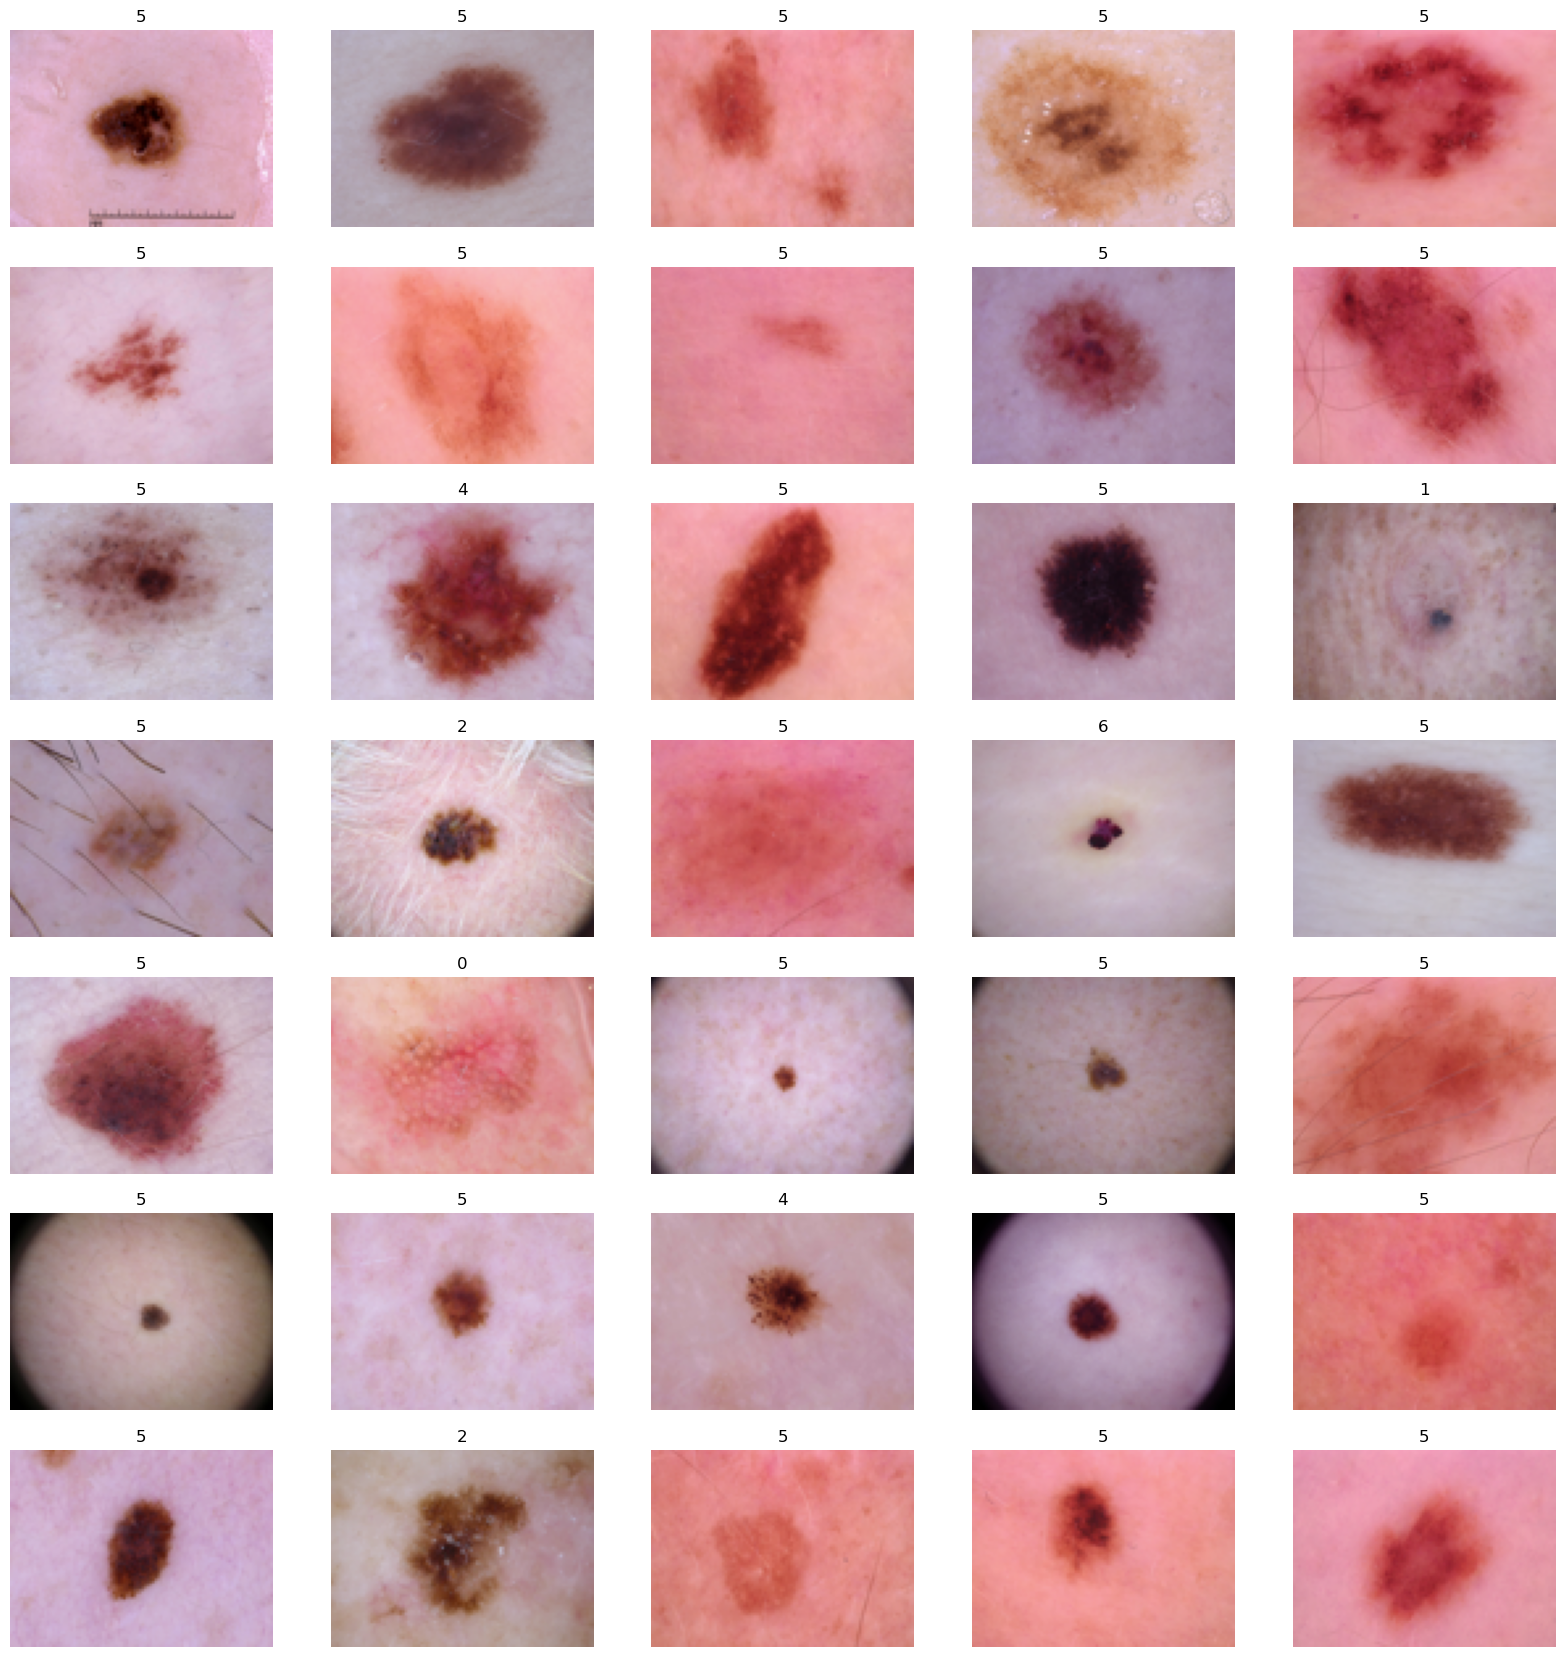

In [15]:
# Create a list of image samples
image_samples = np.random.choice(meta.shape[0], 7 * 5, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(7, 5, figsize=(4 * 5, 3 * 7))

# Plot the image samples
for i, ax in enumerate(axes.flatten()):
    row = meta.iloc[image_samples[i]]
    ax.imshow(row['image'])
    ax.set_title(row['dx_code'])
    ax.axis('off')

# Save the figure
fig.savefig('category_samples.png', dpi=300)

In [16]:
from keras.utils import to_categorical

X = meta['image']
y = to_categorical(meta['dx_code'])

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
print(X_train.shape , "\n")
print(X_train[1].shape , "\n")

(8012,) 

(75, 100, 3) 



In [19]:
type(X_train)

pandas.core.series.Series

In [20]:
# Convert Pandas Series to NumPy arrays
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())

# Reshape image data in 3 dimensions (height = 75, width = 100, channel = 3)
X_train = X_train.reshape(X_train.shape[0], 75, 100, 3)
X_test = X_test.reshape(X_test.shape[0], 75, 100, 3)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [24]:
# Function to plot the confusion matrix with Plotly
def plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        colorscale = 'Plasma'
    else:
        colorscale = 'Magma_r'  # Reversed 'Magma' colorscale for non-normalized matrix

    annotations = []
    for i in range(len(classes)):
        for j in range(len(classes)):
            annotations.append(
                {
                    'x': classes[j],
                    'y': classes[i],
                    'text': str(cm[i, j]),
                    'showarrow': False,
                    'font': {'color': 'red' if cm[i, j] > 0.5 else 'black'}
                }
            )

    fig = go.Figure(data=go.Heatmap(
        z=cm,
        x=list(classes),
        y=list(classes),
        colorscale=colorscale,
        colorbar=dict(title='Normalized' if normalize else 'Count'),
        showscale=True,
        hoverinfo='z'
    ))

    fig.update_layout(
        title='Confusion Matrix',
        xaxis=dict(title='Predicted label'),
        yaxis=dict(title='True label'),
        annotations=annotations
    )

    if normalize:
        fig.update_layout(title_text='Normalized Confusion Matrix')
    else:
        fig.update_layout(title_text='Confusion Matrix (Counts)')

    fig.show()

In [25]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# DenseNet121

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained DenseNet-121 model (weights pre-trained on ImageNet)
base_model = DenseNet121(weights='imagenet', include_top=False)

# Freeze some layers in the base model
num_layers_to_freeze = 95  # Choose the number of layers you want to freeze
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = BatchNormalization()(x)  # Add BatchNormalization layer for better convergence
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model_dense = Model(inputs=base_model.input, outputs=predictions)

# Learning Rate Scheduler
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,   # Adjust decay_steps 
    decay_rate=0.9       # Adjust decay_rate 
)
optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False)

model_dense.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

29084464/29084464 [==============================] - 0s 0us/step


Epoch 1/60
133/133 [==============================] - 100s 221ms/step - loss: 3.5163 - accuracy: 0.6950 - val_loss: 3.0137 - val_accuracy: 0.6036 - lr: 4.9931e-04
Epoch 2/60
133/133 [==============================] - 22s 166ms/step - loss: 1.9276 - accuracy: 0.7775 - val_loss: 1.8645 - val_accuracy: 0.7619 - lr: 4.9861e-04
Epoch 3/60
133/133 [==============================] - 23s 172ms/step - loss: 1.4032 - accuracy: 0.8013 - val_loss: 1.9094 - val_accuracy: 0.7349 - lr: 4.9791e-04
Epoch 4/60
133/133 [==============================] - 23s 173ms/step - loss: 1.1060 - accuracy: 0.8105 - val_loss: 1.2117 - val_accuracy: 0.7733 - lr: 4.9721e-04
Epoch 5/60
133/133 [==============================] - 22s 166ms/step - loss: 0.7983 - accuracy: 0.8393 - val_loss: 0.9137 - val_accuracy: 0.7923 - lr: 4.9651e-04
Epoch 6/60
133/133 [==============================] - 23s 175ms/step - loss: 0.6081 - accuracy: 0.8656 - val_loss: 0.8249 - val_accuracy: 0.8083 - lr: 4.9582e-04
Epoch 7/60
133/133 [=======

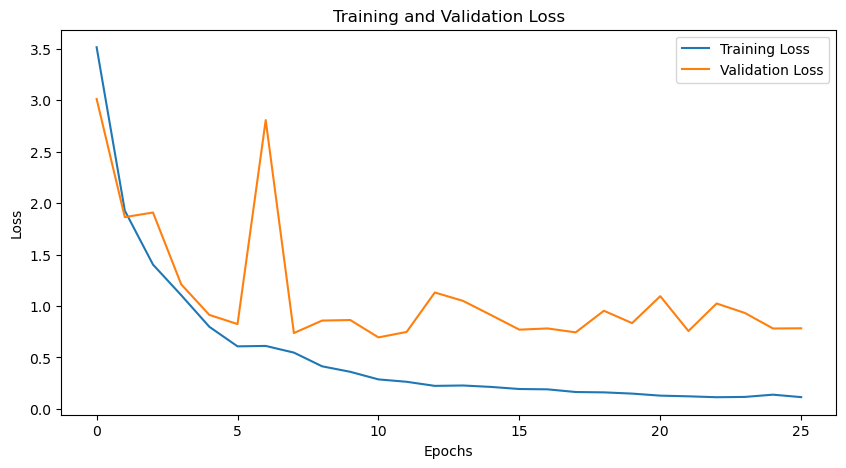

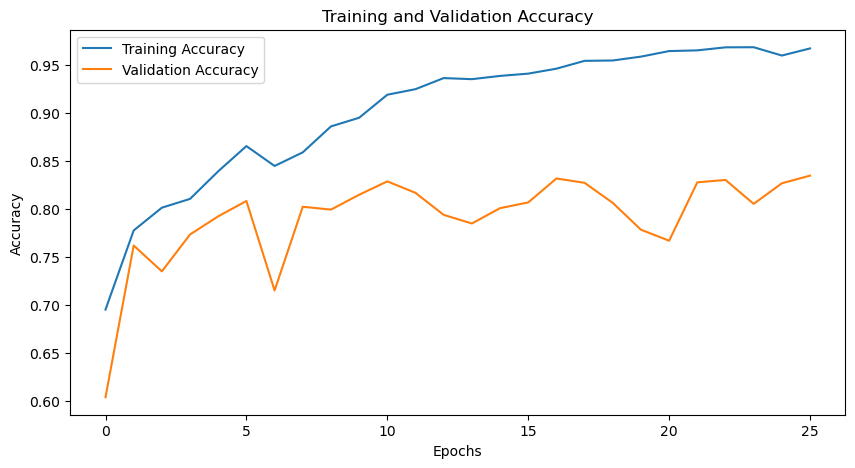

In [27]:
# Fit the model
epochs = 60
batch_size = 60
history = model_dense.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                                    epochs=epochs, verbose=1, steps_per_epoch=X_train.shape[0] // batch_size,
                                    callbacks=[learning_rate_reduction,early_stopping], validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

classes = range(7)
    
# Y_true (true labels) and Y_pred_classes (predicted labels)
Y_pred = model_dense.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix with the new colorscale
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=False)

report = classification_report(Y_true, Y_pred_classes)
print(f"Classification Report for <<DenseNet121>> : ")
print(report)

63/63 [==============================] - 3s 20ms/step


Classification Report for <<DenseNet121>> : 
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        69
           1       0.85      0.51      0.64        93
           2       0.64      0.66      0.65       228
           3       0.63      0.43      0.51        28
           4       0.69      0.52      0.59       226
           5       0.89      0.96      0.92      1338
           6       0.79      0.71      0.75        21

    accuracy                           0.83      2003
   macro avg       0.72      0.60      0.65      2003
weighted avg       0.82      0.83      0.82      2003



# DenseNet121 Useing Categorical Data

**Preprocessing**

In [29]:
split_proportion = 0.8

# Randomly shuffle the rows of the DataFrame
shuffled_data = meta.sample(frac=1, random_state=41)  # random_state for reproducibility

# Calculate the number of rows for the first piece
total_rows = shuffled_data.shape[0]
split_size = int(total_rows * split_proportion)

# Split the DataFrame into two pieces
Train = shuffled_data.iloc[:split_size]
Test = shuffled_data.iloc[split_size:]

In [30]:
from keras.utils import to_categorical

X_train_image = Train['image']
y_train = to_categorical(Train['dx_code'])

X_test_image = Test['image']
y_test = to_categorical(Test['dx_code'])

In [31]:
# Convert Pandas Series to NumPy arrays
X_train_image = np.array(X_train_image.tolist())
X_test_image = np.array(X_test_image.tolist())

# Reshape image data in 3 dimensions (height = 75, width = 100, channel = 3)
X_train_image = X_train_image.reshape(X_train_image.shape[0], 75, 100, 3)
X_test_image = X_test_image.reshape(X_test_image.shape[0], 75, 100, 3)

In [32]:
from sklearn.preprocessing import StandardScaler

categorical_data_train = Train[[ 'age' ,'dx_type' ,"localization" ]]
categorical_data_test = Test[[ 'age' ,'dx_type' ,"localization" ]]

# Define the columns you want to scale
columns_to_scale = ['age']

# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the column to a 2D array before fitting the scaler
categorical_data_train[columns_to_scale] = scaler.fit_transform(categorical_data_train[columns_to_scale].values.reshape(-1, 1))
categorical_data_test[columns_to_scale] = scaler.transform(categorical_data_test[columns_to_scale].values.reshape(-1, 1))

In [33]:
# List of columns to one-hot encode
columns_to_encode = ['dx_type', 'localization']

# Perform one-hot encoding using get_dummies
encoded_train = pd.get_dummies(categorical_data_train, columns=columns_to_encode)
encoded_test = pd.get_dummies(categorical_data_test, columns=columns_to_encode)

**Training DenseNet121**

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


categorical_input = Input(shape=(20,))

# Load the pre-trained DenseNet-121 model (Same as before)
base_model = DenseNet121(weights='imagenet', include_top=False)

# Freeze some layers in the base model
num_layers_to_freeze = 95
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

# After GlobalAveragePooling2D layer, concatenate with the categorical input
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

# Add Custom Layers for Categorical Data
y = Dense(64, activation='relu')(categorical_input)
x = Concatenate()([x, y])

x = BatchNormalization()(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model with both image and categorical inputs
model_dense = Model(inputs=[base_model.input, categorical_input], outputs=predictions)

# Learning Rate Scheduler
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False)

model_dense.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

Epoch 1/60
134/134 [==============================] - 72s 124ms/step - loss: 3.3306 - accuracy: 0.7093 - val_loss: 3.2653 - val_accuracy: 0.6905 - lr: 4.9930e-04
Epoch 2/60
134/134 [==============================] - 13s 96ms/step - loss: 1.7455 - accuracy: 0.8159 - val_loss: 1.6023 - val_accuracy: 0.7479 - lr: 4.9860e-04
Epoch 3/60
134/134 [==============================] - 13s 94ms/step - loss: 1.1601 - accuracy: 0.8485 - val_loss: 1.3130 - val_accuracy: 0.7818 - lr: 4.9789e-04
Epoch 4/60
134/134 [==============================] - 13s 94ms/step - loss: 0.7995 - accuracy: 0.8742 - val_loss: 0.9818 - val_accuracy: 0.7813 - lr: 4.9719e-04
Epoch 5/60
134/134 [==============================] - 13s 97ms/step - loss: 0.5298 - accuracy: 0.9099 - val_loss: 0.8895 - val_accuracy: 0.8138 - lr: 4.9649e-04
Epoch 6/60
134/134 [==============================] - 13s 93ms/step - loss: 0.3715 - accuracy: 0.9348 - val_loss: 0.8892 - val_accuracy: 0.8103 - lr: 4.9579e-04
Epoch 7/60
134/134 [=============

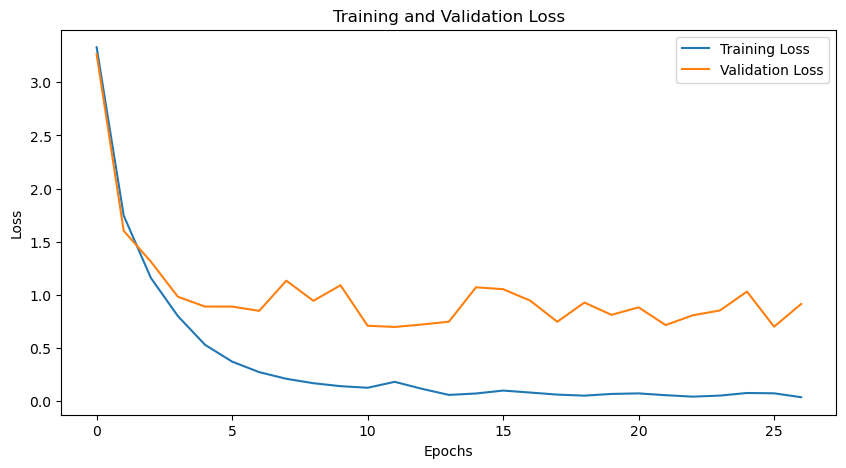

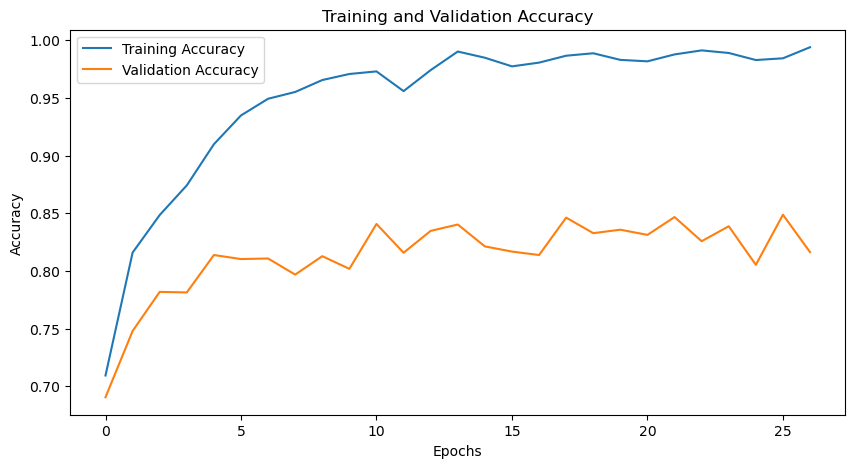

In [35]:
# Train the model with data augmentation and callbacks
epochs = 60
batch_size = 60
history = model_dense.fit(
    [X_train_image, encoded_train],  # Update with your actual image and categorical training data
    y_train, epochs=epochs, batch_size=batch_size,
    callbacks=[learning_rate_reduction , early_stopping], validation_data=([X_test_image, encoded_test], y_test)
)

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model_dense.predict([X_test_image, encoded_test])
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix with the new colorscale
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=False)

report = classification_report(Y_true, Y_pred_classes)
print(f"Classification Report for <<DenseNet121>> : ")
print(report)

63/63 [==============================] - 3s 20ms/step


Classification Report for <<DenseNet121>> : 
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        68
           1       0.81      0.48      0.60       109
           2       0.61      0.66      0.63       228
           3       0.95      0.80      0.87        25
           4       0.58      0.69      0.63       237
           5       0.91      0.91      0.91      1305
           6       0.88      0.74      0.81        31

    accuracy                           0.82      2003
   macro avg       0.76      0.70      0.72      2003
weighted avg       0.82      0.82      0.82      2003



# ResNet50 Useing Categorical Data

In [37]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

categorical_input = Input(shape=(20,))

# Load the pre-trained ResNet-101 model 
base_model = ResNet101(weights='imagenet', include_top=False)

# Freeze some layers in the base model
num_layers_to_freeze = 300
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = True

# After GlobalAveragePooling2D layer, concatenate with the categorical input
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

# Add Custom Layers for Categorical Data
y = Dense(64, activation='relu')(categorical_input)
x = Concatenate()([x, y])

x = BatchNormalization()(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model with both image and categorical inputs
model_resnet = Model(inputs=[base_model.input, categorical_input], outputs=predictions)

# Learning Rate Scheduler
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False)

model_resnet.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

171446536/171446536 [==============================] - 1s 0us/step


Epoch 1/60
134/134 [==============================] - 120s 284ms/step - loss: 4.2095 - accuracy: 0.6976 - val_loss: 2.8578 - val_accuracy: 0.6515 - lr: 4.9930e-04
Epoch 2/60
134/134 [==============================] - 33s 248ms/step - loss: 1.6804 - accuracy: 0.7822 - val_loss: 1.5212 - val_accuracy: 0.6695 - lr: 4.9860e-04
Epoch 3/60
134/134 [==============================] - 32s 241ms/step - loss: 0.9620 - accuracy: 0.7832 - val_loss: 9.4507 - val_accuracy: 0.0349 - lr: 4.9789e-04
Epoch 4/60
134/134 [==============================] - 33s 248ms/step - loss: 0.6478 - accuracy: 0.8148 - val_loss: 0.9615 - val_accuracy: 0.6785 - lr: 4.9719e-04
Epoch 5/60
134/134 [==============================] - 33s 244ms/step - loss: 0.4948 - accuracy: 0.8490 - val_loss: 0.9176 - val_accuracy: 0.6935 - lr: 4.9649e-04
Epoch 6/60
134/134 [==============================] - 33s 248ms/step - loss: 0.3799 - accuracy: 0.8823 - val_loss: 0.8957 - val_accuracy: 0.6885 - lr: 4.9579e-04
Epoch 7/60
134/134 [=======

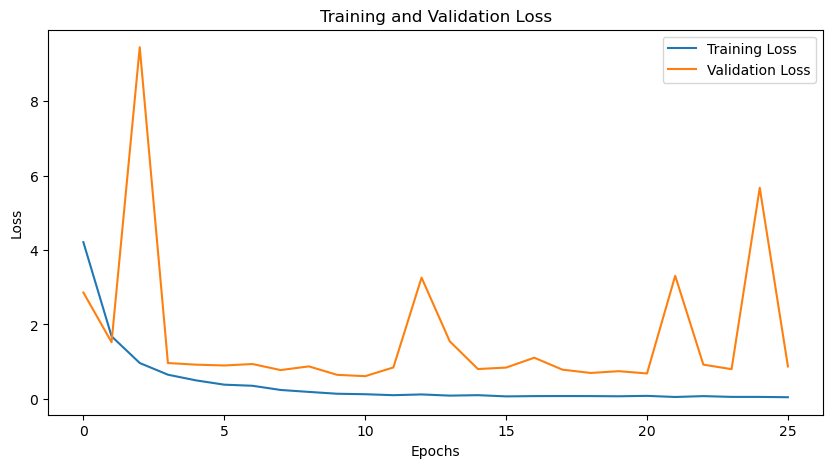

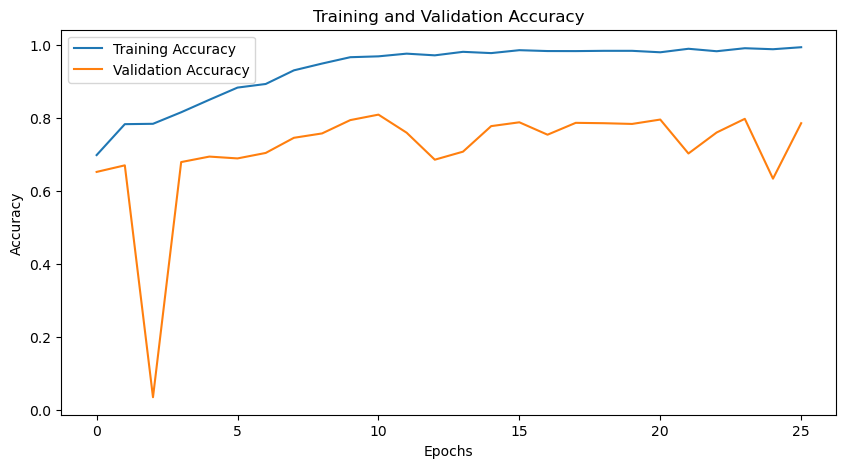

In [38]:
# Train the model with data augmentation and callbacks
epochs = 60
batch_size = 60
history = model_resnet.fit(
    [X_train_image, encoded_train],
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[learning_rate_reduction ,early_stopping ],
    validation_data=([X_test_image, encoded_test], y_test)
)

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model_resnet.predict([X_test_image, encoded_test])
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix with the new colorscale
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=False)

report = classification_report(Y_true, Y_pred_classes)
print(f"Classification Report for <<DenseNet121>> : ")
print(report)

63/63 [==============================] - 5s 46ms/step


Classification Report for <<DenseNet121>> : 
              precision    recall  f1-score   support

           0       0.45      0.69      0.54        68
           1       0.78      0.67      0.72       109
           2       0.64      0.54      0.58       228
           3       0.91      0.40      0.56        25
           4       0.63      0.47      0.54       237
           5       0.88      0.94      0.91      1305
           6       0.92      0.74      0.82        31

    accuracy                           0.81      2003
   macro avg       0.74      0.64      0.67      2003
weighted avg       0.80      0.81      0.80      2003



# InceptionV3

In [40]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
from tensorflow.keras.models import Model
from keras.optimizers import Adam

# Create base InceptionV3 model 
base_model = InceptionV3(input_shape=(75, 100, 3), 
                         include_top=False, weights='imagenet')

# Freeze the base model 
base_model.trainable = False

# Add pooling and new output layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) 
predictions = Dense(7, activation='softmax')(x)

# Create new model 
model_inception = Model(inputs=base_model.input, outputs=predictions)

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_inception.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

87910968/87910968 [==============================] - 0s 0us/step


Epoch 1/60
250/250 [==============================] - 29s 97ms/step - loss: 1.2242 - accuracy: 0.6677 - val_loss: 1.2211 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 2/60
250/250 [==============================] - 21s 82ms/step - loss: 1.1424 - accuracy: 0.6742 - val_loss: 1.2116 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 3/60
250/250 [==============================] - 20s 81ms/step - loss: 1.1248 - accuracy: 0.6748 - val_loss: 1.1988 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 4/60
250/250 [==============================] - 19s 77ms/step - loss: 1.1217 - accuracy: 0.6746 - val_loss: 1.2062 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 5/60
250/250 [==============================] - 20s 79ms/step - loss: 1.1211 - accuracy: 0.6737 - val_loss: 1.2063 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 6/60
250/250 [==============================] - 20s 80ms/step - loss: 1.1054 - accuracy: 0.6742 - val_loss: 1.2174 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 7/60
250/250 [==============================] - 19s 

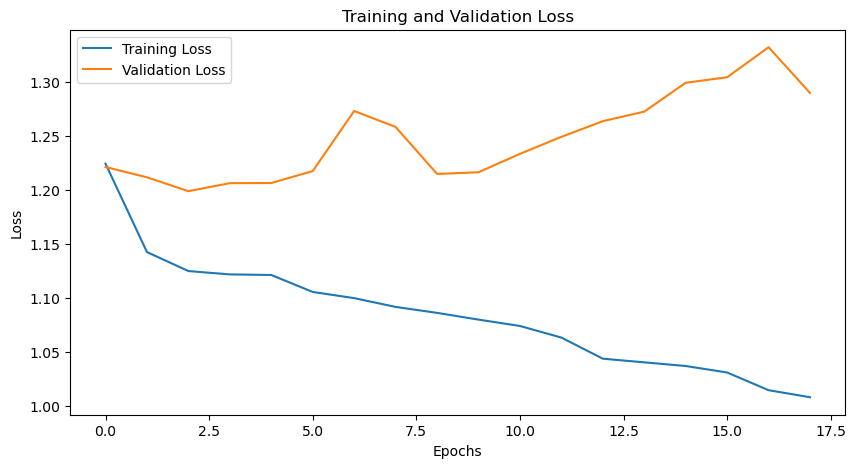

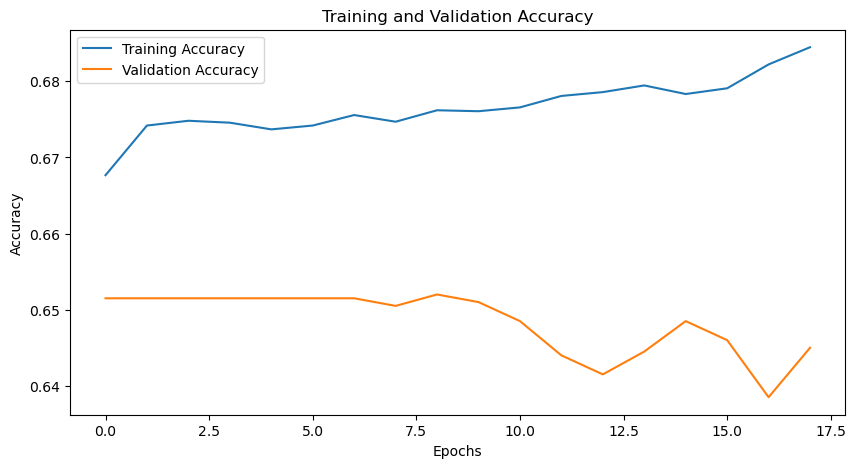

In [41]:
# Fit the model
epochs = 60
batch_size = 32
history = model_inception.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction,early_stopping],validation_data = (X_test,y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [42]:
# Y_true (true labels) and Y_pred_classes (predicted labels)
Y_pred = model_inception.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix with the new colorscale
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=False)

report = classification_report(Y_true, Y_pred_classes)
print(f"Classification Report for <<InceptionV3>> : ")
print(report)

63/63 [==============================] - 2s 15ms/step


Classification Report for <<InceptionV3>> : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.00      0.00      0.00       109
           2       0.00      0.00      0.00       228
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00       237
           5       0.65      1.00      0.79      1305
           6       0.00      0.00      0.00        31

    accuracy                           0.65      2003
   macro avg       0.09      0.14      0.11      2003
weighted avg       0.42      0.65      0.51      2003

